Iris DATASET FOR LOGISTIC REGRESSION !!!

Accuracy Score:  0.9
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion Matrix: 
 [[10  0  0]
 [ 0  8  1]
 [ 0  2  9]]


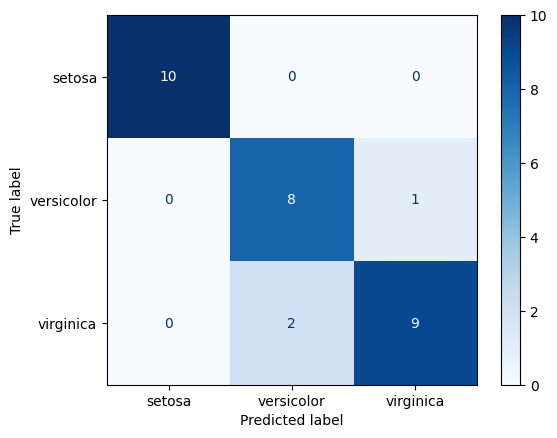

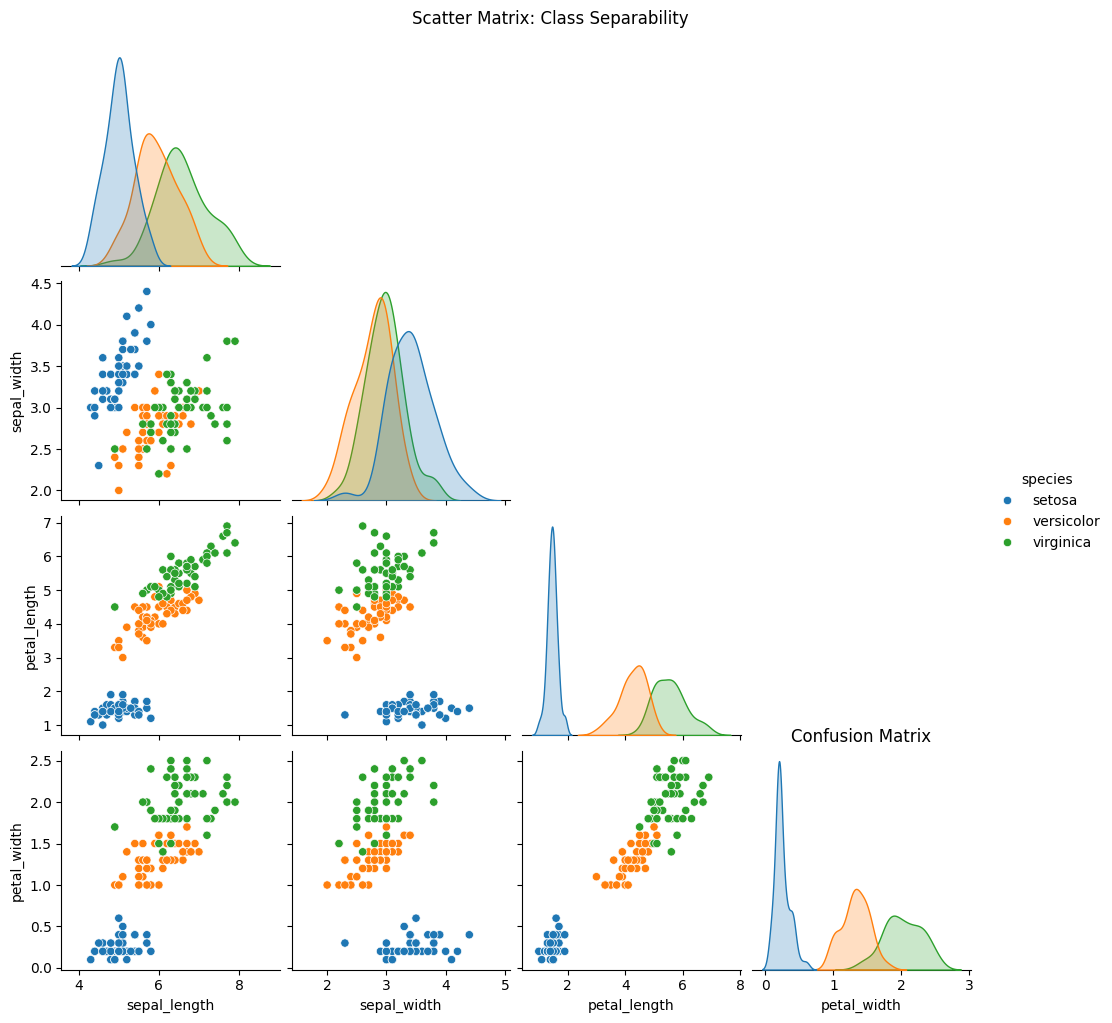

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("../data/Iris.csv")

le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

X = df.drop("species", axis = 1)
y = df["species"]

# added noise just to see how the model performs (without noise, accuracy score is 1.0)
np.random.seed(42)
noise = np.random.normal(0, 0.5, X.shape)  # mean 0, std 0.5 (you can control the noise by changing values)
X_noisy = X + noise


X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Ac_S = accuracy_score(y_test, y_pred)
clas_report = classification_report(y_test, y_pred)
conf_mtrx = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels = le.classes_,  cmap = "Blues", )
#ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
df_plot = df.copy()
df_plot["species"] = le.inverse_transform(df_plot["species"])
sns.pairplot(df_plot, hue="species", corner=True, diag_kind="kde")
plt.suptitle("Scatter Matrix: Class Separability", y=1.02)

print("Accuracy Score: ", Ac_S)
print("Classification Report: \n", clas_report)
print("Confusion Matrix: \n", conf_mtrx)
plt.title("Confusion Matrix")
plt.show()


TITANIC DATASET !!!

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        56

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

Accuracy Score:  1.0
Confusion Matrix: 
 [[87  0]
 [ 0 56]]


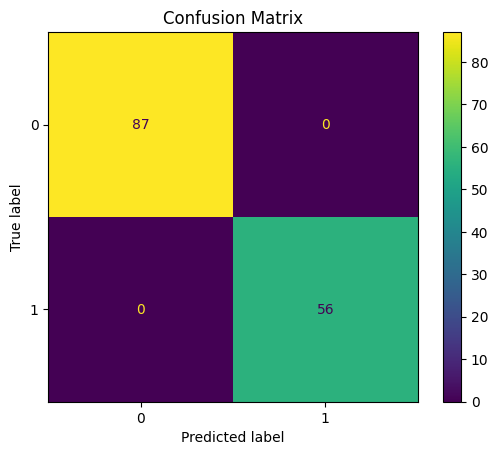

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/Titanic-Dataset.csv")
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']].dropna()

#df = df[['Survived', 'Age', 'Fare', 'Sex', 'Embarked']].dropna()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
#df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

#X = df[['Survived', 'Age', 'Fare', 'Sex', 'Embarked']]      
X = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]    # You can select any features which you think can help in predicting the target.
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
plt.title("Confusion Matrix")
plt.show()

